# Image Data Processing 

## Exercise 1: Image is a matrix of number

In [1]:
%matplotlib inline
import skimage
import numpy as np;
from matplotlib import pyplot as plt
from skimage import io
import os

#filename = os.path.join(skimage.data_dir, 'camera.png')
#camera = io.imread(filename)

<class 'numpy.ndarray'> float64 (10, 10)


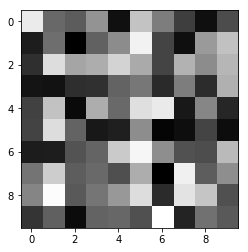

In [2]:
# A 2-D Array can be displayed as image
rand = np.random.random([10, 10])
print (type(rand), rand.dtype,  rand.shape)

plt.imshow(rand, cmap='gray');


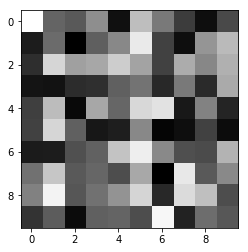

In [3]:
# Matrix (image) values can be changed manually
rand[0,0] = 1
plt.imshow(rand, cmap='gray');


# Excerise 2: Convert Images to Another Format
Using the save() method, PIL can save images in most image file formats. Here’s an
example that takes all image files in a list of filenames (filelist) and converts the images
to JPEG files:

In [4]:
from PIL import Image
# https://pillow.readthedocs.io/en/5.1.x/
import os

def get_imlist(path):
# Returns a list of filenames for all tif images in a directory. 
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.tif')]


filelist = get_imlist("images/untreated/dna")
for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".jpg"
    if infile != outfile:
        try:
            #Image.open(infile).save(outfile)
            inputimage = io.imread(infile)
            io.imsave(outfile, inputimage)
        except IOError:
            print ("cannot convert", infile)
        

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (10).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (103).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (104).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (106).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (20).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (200).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (205).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (206).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (212).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (90).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (92).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (93).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (94).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\1 (95).jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: images/untreated/dna\

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
# give the prediction of one image with the image file name
def predict_image(filename, model):
    img_path = data_dir + filename 
    img = load_img(img_path, target_size=image_shape)  # this is a PIL image
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = label_map[str(pred.argmax(axis=-1)[0])]
    return pred

# Excercise 3: Extracting ROI using thresholding

## Histograms

Sometimes you want to examining a specific data range, enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function. Histograms can also be very useful in working out global thresholding.

<class 'numpy.ndarray'> uint16 (1024, 1024)


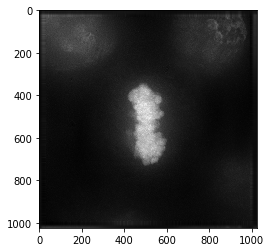

In [28]:
#Histograms
dna = io.imread("images/untreated/dna/1 (1).tif")
print (type(dna), dna.dtype,  dna.shape)
plt.imshow(dna, cmap='gray');

(array([  1.70000000e+01,   1.20000000e+02,   3.77000000e+02,
          1.26500000e+03,   4.23600000e+03,   1.12500000e+04,
          2.12780000e+04,   3.65130000e+04,   4.73030000e+04,
          4.91820000e+04,   5.17470000e+04,   5.11580000e+04,
          4.64490000e+04,   4.55630000e+04,   4.01330000e+04,
          3.32090000e+04,   3.14930000e+04,   2.85640000e+04,
          2.57350000e+04,   2.55300000e+04,   2.48960000e+04,
          2.26740000e+04,   2.32650000e+04,   2.22380000e+04,
          1.95330000e+04,   1.94260000e+04,   1.83430000e+04,
          1.59790000e+04,   1.57980000e+04,   1.42110000e+04,
          1.22420000e+04,   1.14580000e+04,   1.02770000e+04,
          8.80700000e+03,   8.75300000e+03,   8.19400000e+03,
          7.28900000e+03,   7.59600000e+03,   7.75100000e+03,
          7.24000000e+03,   7.64700000e+03,   7.81300000e+03,
          7.47800000e+03,   7.78900000e+03,   7.70600000e+03,
          7.18800000e+03,   7.20100000e+03,   6.59600000e+03,
        

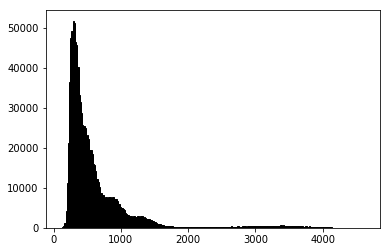

In [31]:
plt.hist(dna.ravel(), bins=256,  fc='k', ec='k')

# Thresholding
Thresholding is the simplest method of image segmentation.

<class 'numpy.ndarray'> uint16 (1024, 1024)


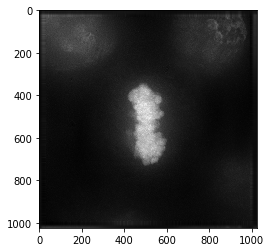

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


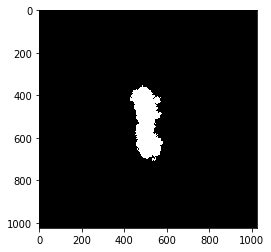

In [42]:
dna_thresholding = 1*(dna>2500)  # change thresholding number to see the effect
plt.imshow(dna_thresholding, cmap='gray');
print(dna)

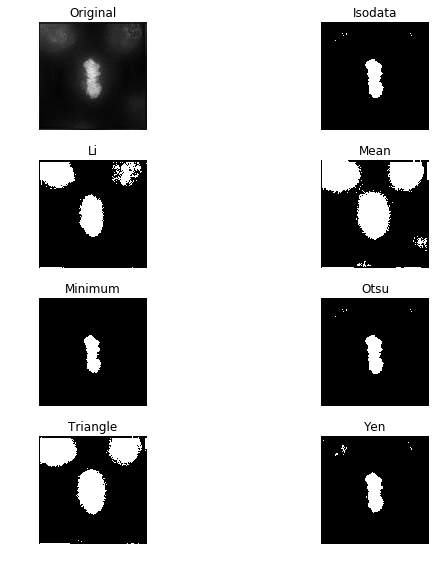

In [33]:
# Thresholding algorithms
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(dna, figsize=(10, 8), verbose=False)
plt.show()

From above visualisation it's clear to us that Isodata, Minimum and Otsu thresholding working well to setment DNA. Lets us Otsu.

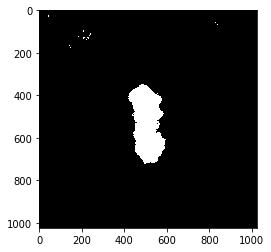

In [38]:
from skimage.filters import threshold_otsu, threshold_local
global_thresh = threshold_otsu(dna)
dna_bw = dna > global_thresh
plt.imshow(dna_bw, cmap='gray')

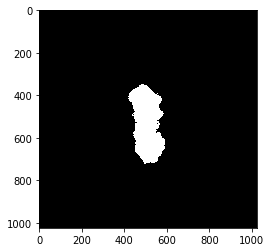

In [39]:
from skimage import morphology

dna_bw = morphology.remove_small_objects(dna_bw, 25000)

plt.imshow(dna_bw, cmap='gray')

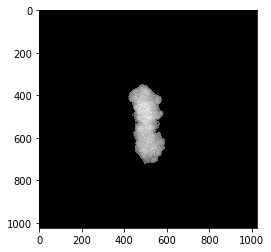

In [40]:
# To extract cleaned DNA
dna_clean = dna
dna_clean[~dna_bw]=0
plt.imshow(dna_clean, cmap='gray')

## Measuring the ROI (Region of Interest)
Let's do some measurements

In [48]:
# What's the size of DNA (area), = How many pixels are white
# skimage.measure.perimeter(image, neighbourhood=4)
import skimage.measure
dna_peri = perimeter(dna_bw, neighbourhood=4)      # try neighbourhood=8, note difference in the measurement reported
print(dna_peri)

1408.42048969


In [68]:

dna_bw_label = skimage.measure.label(dna_bw)
dna_props = skimage.measure.regionprops(label_image=dna_bw_label, intensity_image=dna)
dna_mean_area = dna_props[0].area
dna_perimeter = dna_props[0].perimeter
dna_mean_intensity = dna_props[0].mean_intensity
print(dna_mean_area, dna_mean_intensity, dna_perimeter)


1408.42048969 43443 3035.42126465 1408.42048969


In [67]:
# To whatelse can be extracted from dna_props
for prop in dna_props[0]:  # since we know there is only one object so the index is 0
    print(prop)

area
bbox
bbox_area
centroid
convex_area
convex_image
coords
eccentricity
equivalent_diameter
euler_number
extent
filled_area
filled_image
image
label
major_axis_length
max_intensity
mean_intensity
min_intensity
minor_axis_length
moments
moments_central
moments_hu
moments_normalized
orientation
perimeter
solidity
weighted_centroid
weighted_moments
weighted_moments_central
weighted_moments_hu
weighted_moments_normalized


# Exercise 4: Quantifying ROI and saving to CSV
## Process all images in a folder
Put above code in a function and process all images


In [10]:
import csv
from skimage.filters import threshold_otsu
from skimage import morphology
def processimages(infile, filename2save):
    
    dna = io.imread(infile)
    global_thresh = threshold_otsu(dna)
    dna_bw = dna > global_thresh
    dna_bw = morphology.remove_small_objects(dna_bw, 25000)
    
    dna_bw_label = skimage.measure.label(dna_bw)
    dna_props = skimage.measure.regionprops(label_image=dna_bw_label, intensity_image=dna)
    
    dna_area = dna_props[0].area
    dna_perimeter = dna_props[0].perimeter
    dna_mean_intensity = dna_props[0].mean_intensity

    with open(filename2save, "a", newline='') as csvfile: 
        writer = csv.writer(csvfile)
        writer.writerow([infile, dna_area, dna_perimeter, dna_mean_intensity])
    
   # print(dna_area, dna_mean_intensity, dna_perimeter)

# Process untreated dna images
filename2save = 'untreated_dna.csv'
with open(filename2save, "w", newline='') as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(['fname', 'area', 'perimeter', 'mean_intensity'])

filelist = get_imlist("images/untreated/dna")
for infile in filelist:
    try:
        processimages(infile, filename2save)        
    except IOError:
        print ("An error occured: ", infile)
        
print("processing completed.")

processing completed.


In [12]:
# Process treated dna images
filename2save = 'treated_dna.csv'
with open(filename2save, "w", newline='') as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(['fname', 'area', 'perimeter', 'mean_intensity'])
    
filelist = get_imlist("images/treated/dna")
for infile in filelist:
    try:
        processimages(infile, filename2save)
    except IOError:
        print ("An error occured: ", infile)
print("processing completed.")        

processing completed.


In [16]:
# print(len(filelist))

261


## Exploring DNA data

In [17]:
dna_untreated_data = list(csv.DictReader(open('untreated_dna.csv')))
dna_treated_data = list(csv.DictReader(open('treated_dna.csv')))
print(dna_treated_data[0])
print(dna_untreated_data[0])

OrderedDict([('fname', 'images/treated/dna\\1 (1).tif'), ('area', '58144'), ('perimeter', '4676.8442969'), ('mean_intensity', '1657.6992123')])
OrderedDict([('fname', 'images/untreated/dna\\1 (1).tif'), ('area', '43443'), ('perimeter', '1408.42048969'), ('mean_intensity', '3035.42126465')])


In [18]:
len(dna_treated_data)

261

In [22]:
import numpy as np
  
# dna_untreated_area = np.array(dna_untreated_area).astype(np.float)
dna_untreated_area = [row['area'] for row in dna_untreated_data]
dna_treated_area = [row['area'] for row in dna_treated_data]
dna_untreated_area = np.array(dna_untreated_area).astype(np.float)
dna_treated_area = np.array(dna_treated_area).astype(np.float)

# print(dna_untreated_area)

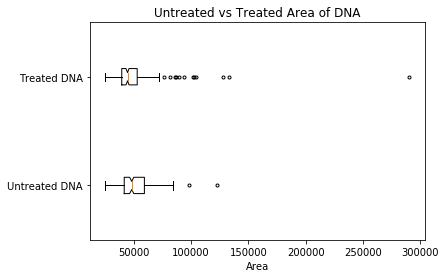

In [23]:
plt.boxplot([dna_untreated_area, dna_treated_area], 
            vert=False, notch=True, flierprops={'marker':'.'})
#plt.axis([40000,44000,55000,60000])
plt.yticks([1,2], ['Untreated DNA', 'Treated DNA'])
plt.xlabel('Area')
plt.title('Untreated vs Treated Area of DNA')
plt.show()